In [30]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import norm
from scipy import stats
import math
from sklearn.neighbors import KernelDensity
from statsmodels.distributions.empirical_distribution import ECDF

In [31]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

matplotlib.rc('font', **font)

# PMF, PDF, CDF, ECDF

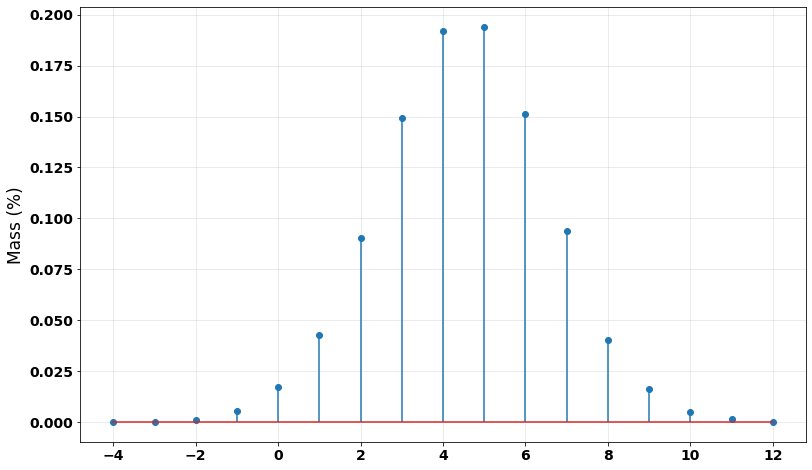

In [33]:
rand_descrete = pd.DataFrame(np.floor(np.random.normal(loc=5, scale=2, size=20000)))
pmf = rand_descrete[0].value_counts().sort_index() / len(rand_descrete)
plt.figure(figsize=(13, 8))
plt.grid(alpha=0.3)
plt.stem(pmf.index, pmf)
# sns.distplot(rand_descrete, kde=True, norm_hist=True,hist=False)
plt.ylabel("Mass (%)",  size=17)
plt.savefig('pmf.jpg')

C:\Users\Ramin\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


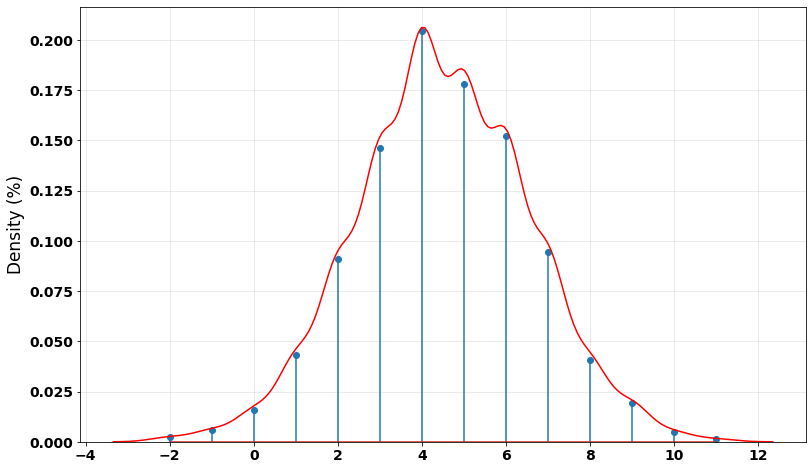

In [11]:
rand_cont = pd.DataFrame(np.random.normal(loc=5, scale=2, size=2000))
pmf = rand_descrete[0].value_counts().sort_index() / len(rand_descrete)
plt.figure(figsize=(13, 8))
plt.grid(alpha=0.3)
plt.stem(pmf.index, pmf)
sns.distplot(rand_descrete, kde=True, norm_hist=True,hist=False, color='r')
plt.ylabel("Density (%)",  size=17)
plt.savefig('pdf.jpg')

In [34]:
def epsilon(n, alpha=0.05):
    return np.sqrt(1. / (2. * n) * np.log(2. / alpha))

def plot_dist(rv, n, name, low, high, pltnum=111):
    samples = rv.rvs(n)
    ecdf = ECDF(samples)

    x = np.linspace(low, high, 100000)
    eps = epsilon(n=len(samples))
    df = pd.DataFrame(ecdf(x), index=x)
    df['ecdf'] = ecdf(x)
    df['cdf'] = rv.cdf(x)
    plt.figure(figsize=(13, 8))
#     plt.subplot(pltnum)

#     sns.distplot(samples, hist=False, label='PDF')
    df['ecdf'].plot(label='ECDF')
    df['cdf'].plot(label='CDF', style='r--')
#     plt.axhline(y=0.8, color='b', linestyle='--')
#     plt.axvline(x=.84, color='b', linestyle='--')
#     plt.hlines(y=.8, color='b', linestyle='--', xmin=-3, xmax=.84)
#     plt.text(x=.9, y=0.1, s='x =  0.84')
#     plt.vlines(x=.84, ymin=-1 , ymax=.8)
    df['upper'] = pd.Series(ecdf(x), index=x).apply(lambda x: min(x + eps, 1.))
    df['lower'] = pd.Series(ecdf(x), index=x).apply(lambda x: max(x - eps, 0.))
    plt.fill_between(x, df['upper'], df['lower'], 
                     alpha=0.1, label='Confidence Band')
    plt.legend(loc='best')
    plt.grid(alpha=0.3)
    plt.title('%s ECDF (n=%d)' % (name, len(samples)))
    plt.savefig('ECDF_bounds.jpg')

<Figure size 864x720 with 0 Axes>

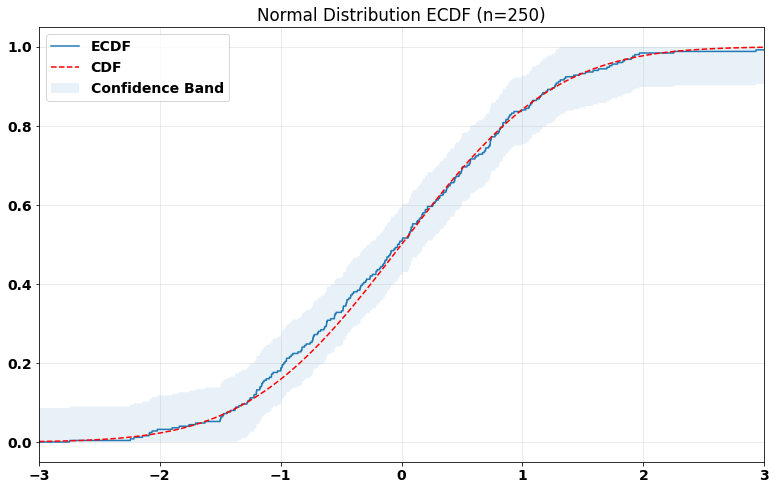

In [50]:
plt.figure(1, figsize=(12, 10))
norm = stats.norm(0., 1.)
plot_dist(norm, 250, name='Normal Distribution', low=-3, high=3, pltnum=221)

# Normal Distribution and parametric estimation

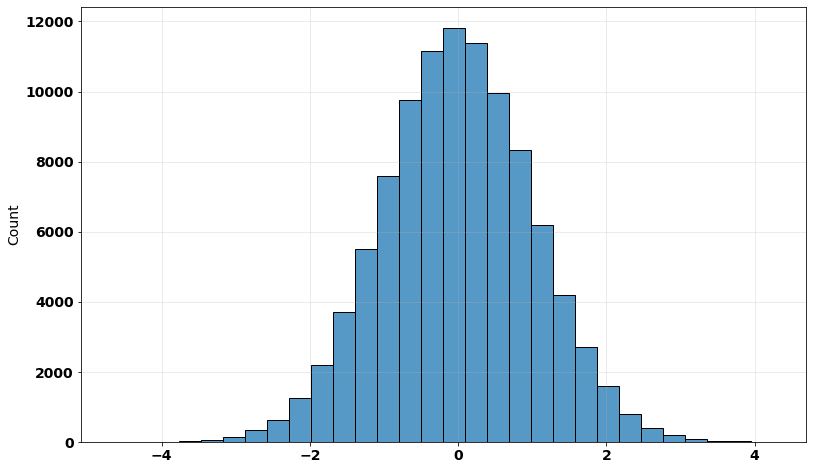

In [38]:
penguins = sns.load_dataset("penguins")
plt.figure(figsize=(13, 8))
plt.grid(alpha=0.3)
sns.histplot(data=np.random.normal(size=100000), bins=30)
plt.savefig('norm_hist.jpg')

In [8]:
def CDF(x, mu, sigma):
    return (1 + math.erf((x - mu) / sigma / math.sqrt(2))) / 2

In [9]:
CDF(100, 50, 100)

0.691462461274013

# KDE

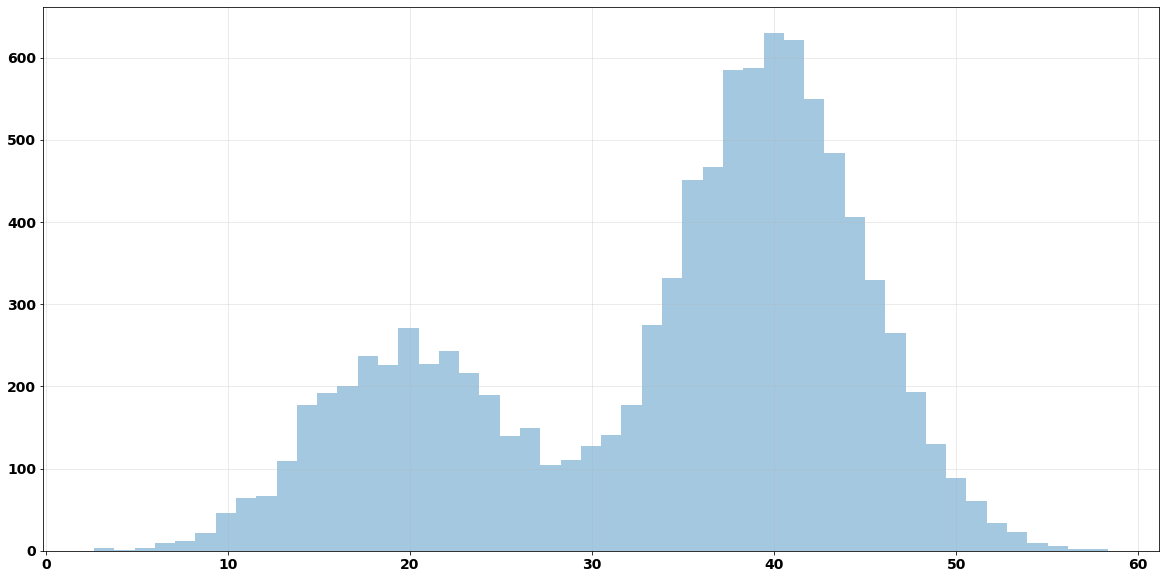

In [43]:
sample1 = np.random.normal(loc=20, scale=5, size=3000)
sample2 = np.random.normal(loc=40, scale=5, size=7000)
sample = np.hstack((sample1, sample2))
# plot the histogram
# plt.figure()
# plt.grid(alpha=0.3)


plt.figure(figsize=(20, 10))
sns.distplot(sample, bins=50, kde=False)
plt.grid(alpha=0.3)
plt.savefig('non_norm_hist.jpg')
plt.show()

C:\Users\Ramin\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


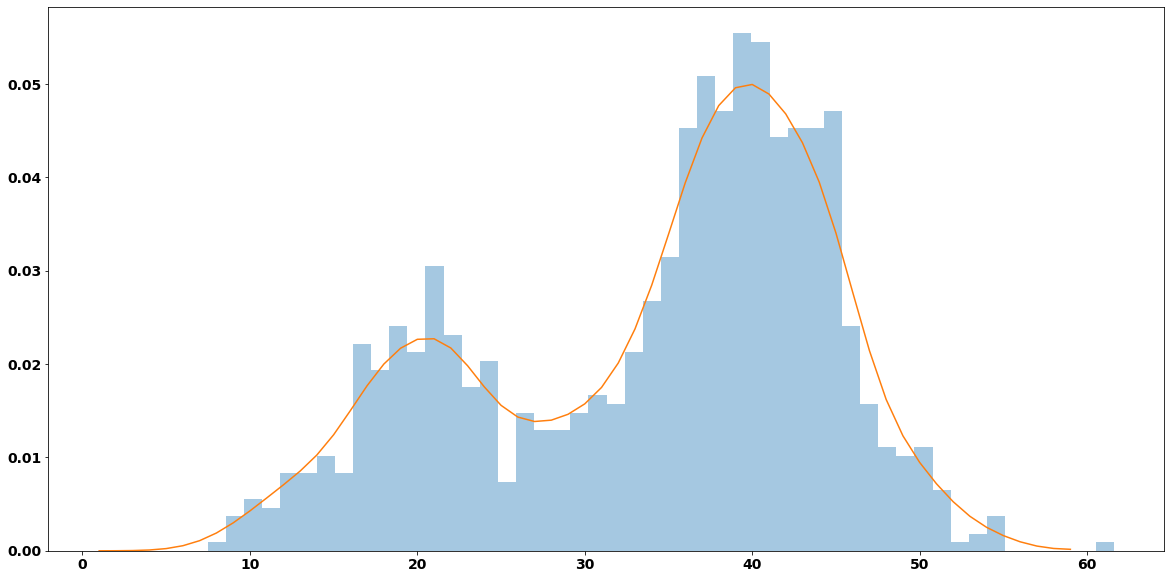

In [41]:
model = KernelDensity(bandwidth=2, kernel='gaussian')
sample = sample.reshape((len(sample), 1))
model.fit(sample)
# sample probabilities for a range of outcomes
values = np.asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)
# plot the histogram and pdf
plt.figure(figsize=(20, 10))
sns.distplot(sample, bins=50, kde=False, norm_hist=True)
plt.plot(values[:], probabilities)
plt.savefig('non_norm_hist_kde.jpg')
plt.show()